In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [59]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [60]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [61]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2018, 1, 1)
Apple = quandl.get('WIKI/AAPL',start_date=start,end_date=end)

In [62]:
Apple.head(2)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,409.4,412.50,409.00,411.23,10793600.0,0.0,1.0,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,410.0,414.68,409.28,413.44,9286500.0,0.0,1.0,52.690714,53.292160,52.598184,53.132802,65005500.0


In [63]:
raw_seq=Apple['Adj. Close'].values

In [64]:
raw_seq.shape

(1507,)

In [65]:
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [66]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [67]:
X.shape, y.shape

((1502, 5, 1), (1502,))

In [68]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

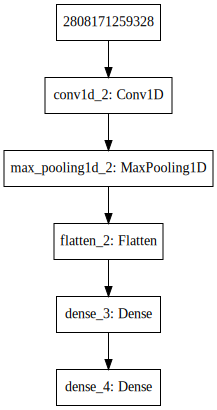

In [69]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 4, 64)             192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 6,693
Trainable params: 6,693
Non-trainable params: 0
_________________________________________________________________


In [71]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [72]:
history=model.fit(X_train, y_train, epochs=200, verbose=2, validation_split=0.15, shuffle=False)

Train on 1020 samples, validate on 181 samples
Epoch 1/200
 - 0s - loss: 627.0160 - val_loss: 27.7424
Epoch 2/200
 - 0s - loss: 24.0655 - val_loss: 5.1441
Epoch 3/200
 - 0s - loss: 5.4059 - val_loss: 4.7353
Epoch 4/200
 - 0s - loss: 4.6566 - val_loss: 5.5282
Epoch 5/200
 - 0s - loss: 4.5208 - val_loss: 6.2730
Epoch 6/200
 - 0s - loss: 4.4397 - val_loss: 6.6327
Epoch 7/200
 - 0s - loss: 4.3741 - val_loss: 6.7438
Epoch 8/200
 - 0s - loss: 4.3294 - val_loss: 6.8012
Epoch 9/200
 - 0s - loss: 4.3012 - val_loss: 6.8497
Epoch 10/200
 - 0s - loss: 4.2821 - val_loss: 6.8936
Epoch 11/200
 - 0s - loss: 4.2685 - val_loss: 6.9341
Epoch 12/200
 - 0s - loss: 4.2582 - val_loss: 6.9840
Epoch 13/200
 - 0s - loss: 4.2510 - val_loss: 7.0361
Epoch 14/200
 - 0s - loss: 4.2456 - val_loss: 7.0917
Epoch 15/200
 - 0s - loss: 4.2418 - val_loss: 7.1477
Epoch 16/200
 - 0s - loss: 4.2393 - val_loss: 7.2023
Epoch 17/200
 - 0s - loss: 4.2378 - val_loss: 7.2579
Epoch 18/200
 - 0s - loss: 4.2375 - val_loss: 7.2911
Epoc

Epoch 154/200
 - 0s - loss: 3.2128 - val_loss: 3.0643
Epoch 155/200
 - 0s - loss: 3.2179 - val_loss: 3.0634
Epoch 156/200
 - 0s - loss: 3.2204 - val_loss: 3.0674
Epoch 157/200
 - 0s - loss: 3.2267 - val_loss: 3.0679
Epoch 158/200
 - 0s - loss: 3.2298 - val_loss: 3.0646
Epoch 159/200
 - 0s - loss: 3.2343 - val_loss: 3.0726
Epoch 160/200
 - 0s - loss: 3.2387 - val_loss: 3.0559
Epoch 161/200
 - 0s - loss: 3.2384 - val_loss: 3.0751
Epoch 162/200
 - 0s - loss: 3.2469 - val_loss: 3.0644
Epoch 163/200
 - 0s - loss: 3.3010 - val_loss: 3.1371
Epoch 164/200
 - 0s - loss: 3.3240 - val_loss: 3.0422
Epoch 165/200
 - 0s - loss: 3.2615 - val_loss: 3.0530
Epoch 166/200
 - 0s - loss: 3.2550 - val_loss: 3.0407
Epoch 167/200
 - 0s - loss: 3.2453 - val_loss: 3.0399
Epoch 168/200
 - 0s - loss: 3.2553 - val_loss: 3.0463
Epoch 169/200
 - 0s - loss: 3.2593 - val_loss: 3.0416
Epoch 170/200
 - 0s - loss: 3.2616 - val_loss: 3.0368
Epoch 171/200
 - 0s - loss: 3.2621 - val_loss: 3.0256
Epoch 172/200
 - 0s - loss: 

In [73]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'CNN_uni_apple' + mytime 

In [74]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 10)

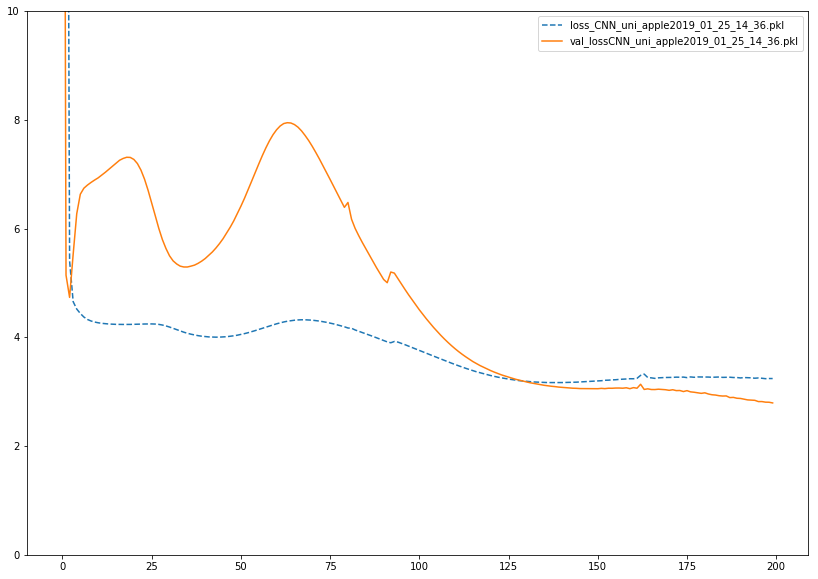

In [77]:
histories = ['CNN_uni_apple2019_01_25_14_36.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 10)

In [78]:
yhat = model.predict(X_test, verbose=2)

In [79]:
X_test[-1]

array([[ 175.01],
       [ 175.01],
       [ 170.57],
       [ 170.6 ],
       [ 171.08]])

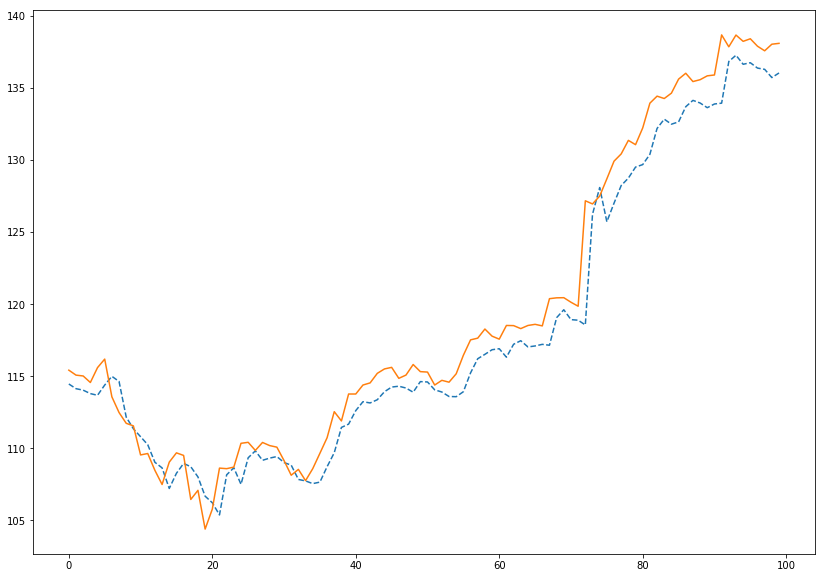

In [81]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat[:100],label ='prediction' ,linestyle='--')
plt.plot(y_test[:100],label='real' )

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
r2_score(y_test, yhat) 

0.98338964279342411

In [84]:
mean_squared_error(y_test, yhat) 

6.6259425488679131

In [58]:
y_test[-10:]

array([ 109.85614699,   75.49037212,  130.40911309,  122.50621944,
        114.22775837,   86.78158692,  157.41      ,   93.79685334,
         86.57451589,   55.78753337])

In [43]:
y_test[-6:-1]

array([ 114.22775837,   86.78158692,  157.41      ,   93.79685334,
         86.57451589])

In [44]:
test=y_test[-6:-1]


In [49]:
test=test.reshape(1,5,1)

In [52]:
test

array([[[ 114.22775837],
        [  86.78158692],
        [ 157.41      ],
        [  93.79685334],
        [  86.57451589]]])

In [53]:
y = model.predict(test, verbose=2)

In [54]:
y

array([[ 102.55635834]], dtype=float32)